# Setup

In [1]:
# import modules

import toolbox_morph
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table
import glob


In [2]:
# define paths

path_main_directory = '/Users/sandrotacchella/ASTRO/SRMP/morph_project/'
path_SFH_table = path_main_directory + 'SFH/Behroozi+19/'


# Grid

In [4]:
# make grid
# alpha: normalization
# beta: mass dependence => (M/10**10)**beta
# gamma: sSFR dependence => ((SFR/M)/10**-10)**gamma
# delta: redshift dependence => (1+z)**delta

alpha_test_values_list = np.logspace(-1, 2.0, num=12)
beta_test_values_list = np.linspace(0.0, 5.0, num=11)
gamma_test_values_list = np.linspace(-3.0, 3.0, num=7)
delta_test_values_list = np.linspace(-3.0, 3.0, num=7)

print(alpha_test_values_list)
print(beta_test_values_list)
print(gamma_test_values_list)
print(delta_test_values_list)


[  0.1          0.18738174   0.35111917   0.65793322   1.23284674
   2.3101297    4.32876128   8.11130831  15.19911083  28.48035868
  53.36699231 100.        ]
[0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5. ]
[-3. -2. -1.  0.  1.  2.  3.]
[-3. -2. -1.  0.  1.  2.  3.]


In [6]:
radius_kpc = np.linspace(0.0, 30.0, num=301)
print radius_kpc


[ 0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1.   1.1  1.2  1.3
  1.4  1.5  1.6  1.7  1.8  1.9  2.   2.1  2.2  2.3  2.4  2.5  2.6  2.7
  2.8  2.9  3.   3.1  3.2  3.3  3.4  3.5  3.6  3.7  3.8  3.9  4.   4.1
  4.2  4.3  4.4  4.5  4.6  4.7  4.8  4.9  5.   5.1  5.2  5.3  5.4  5.5
  5.6  5.7  5.8  5.9  6.   6.1  6.2  6.3  6.4  6.5  6.6  6.7  6.8  6.9
  7.   7.1  7.2  7.3  7.4  7.5  7.6  7.7  7.8  7.9  8.   8.1  8.2  8.3
  8.4  8.5  8.6  8.7  8.8  8.9  9.   9.1  9.2  9.3  9.4  9.5  9.6  9.7
  9.8  9.9 10.  10.1 10.2 10.3 10.4 10.5 10.6 10.7 10.8 10.9 11.  11.1
 11.2 11.3 11.4 11.5 11.6 11.7 11.8 11.9 12.  12.1 12.2 12.3 12.4 12.5
 12.6 12.7 12.8 12.9 13.  13.1 13.2 13.3 13.4 13.5 13.6 13.7 13.8 13.9
 14.  14.1 14.2 14.3 14.4 14.5 14.6 14.7 14.8 14.9 15.  15.1 15.2 15.3
 15.4 15.5 15.6 15.7 15.8 15.9 16.  16.1 16.2 16.3 16.4 16.5 16.6 16.7
 16.8 16.9 17.  17.1 17.2 17.3 17.4 17.5 17.6 17.7 17.8 17.9 18.  18.1
 18.2 18.3 18.4 18.5 18.6 18.7 18.8 18.9 19.  19.1 19.2 19.3 19.4 19.5
 19.6 

In [7]:
# create list of SFH tables

list_SFH_tables = glob.glob(path_SFH_table + '*a1.002310.dat')
print(list_SFH_tables)


['/Users/sandrotacchella/ASTRO/SRMP/morph_project/SFH/Behroozi+19/sfh_sm10.10_a1.002310.dat', '/Users/sandrotacchella/ASTRO/SRMP/morph_project/SFH/Behroozi+19/sfh_sm10.30_a1.002310.dat', '/Users/sandrotacchella/ASTRO/SRMP/morph_project/SFH/Behroozi+19/sfh_sm10.50_a1.002310.dat', '/Users/sandrotacchella/ASTRO/SRMP/morph_project/SFH/Behroozi+19/sfh_sm10.70_a1.002310.dat', '/Users/sandrotacchella/ASTRO/SRMP/morph_project/SFH/Behroozi+19/sfh_sm10.90_a1.002310.dat', '/Users/sandrotacchella/ASTRO/SRMP/morph_project/SFH/Behroozi+19/sfh_sm11.10_a1.002310.dat', '/Users/sandrotacchella/ASTRO/SRMP/morph_project/SFH/Behroozi+19/sfh_sm11.30_a1.002310.dat', '/Users/sandrotacchella/ASTRO/SRMP/morph_project/SFH/Behroozi+19/sfh_sm11.50_a1.002310.dat', '/Users/sandrotacchella/ASTRO/SRMP/morph_project/SFH/Behroozi+19/sfh_sm11.70_a1.002310.dat', '/Users/sandrotacchella/ASTRO/SRMP/morph_project/SFH/Behroozi+19/sfh_sm8.50_a1.002310.dat', '/Users/sandrotacchella/ASTRO/SRMP/morph_project/SFH/Behroozi+19/sfh_s

# Observations

In [8]:
def Mosleh2013_SF(mass):
    alpha, beta, gamma, M0 = 0.109, 0.263, 10**-0.743, 10**10.204
    return(gamma*mass**alpha*(1+mass/M0)**(beta-alpha))

def Mosleh2013_Q(mass):
    alpha, beta, gamma, M0 = 0.014, 0.912, 10**-0.058, 10**10.555
    return(gamma*mass**alpha*(1+mass/M0)**(beta-alpha))


# Functions

In [9]:
def compute_sizes(SFH_table, alpha_test_values_list, beta_test_values_list, gamma_test_values_list, delta_test_values_list):    
    
    RM_Q_list = []
    RM_SF_list = []

    for ii_alpha in alpha_test_values_list:
        for ii_beta in beta_test_values_list:
            for ii_gamma in gamma_test_values_list:
                for ii_delta in delta_test_values_list:
                    gal_Q = toolbox_morph.galaxy(radius_kpc, SFH_table['scale_factor'], SFH_table['SFH_Q'], [ii_alpha,ii_beta,ii_gamma,ii_delta])
                    RM_Q_list.append(gal_Q.get_size(redshift_in=0.0))
                    gal_SF = toolbox_morph.galaxy(radius_kpc, SFH_table['scale_factor'], SFH_table['SFH_SF'], [ii_alpha,ii_beta,ii_gamma,ii_delta])
                    RM_SF_list.append(gal_SF.get_size(redshift_in=0.0))

    mass_Q = gal_Q.get_mass_after_mass_loss(redshift_in=0.0)
    mass_SF = gal_SF.get_mass_after_mass_loss(redshift_in=0.0)
    
    return(mass_Q, mass_SF, RM_Q_list, RM_SF_list)


# Sample Grid


In [10]:
mass_Q_list = []
mass_SF_list = []
RM_Q_stack = []
RM_SF_stack = []

# for each SFH table, mass_Q, mass_SF, and RM_Q_list, RM_SF_list are found and added to lists initialized above
for SFH_file in list_SFH_tables:
    print('reading in', SFH_file)
    SFH_table = Table.read(SFH_file, format='ascii', names=('scale_factor', 'SFH_all', 'SFH_all_up', 'SFH_all_dw', 'SFH_SF', 'SFH_SF_up', 'SFH_SF_dw', 'SFH_Q', 'SFH_Q_up', 'SFH_Q_dw', 'SFH_Cen', 'SFH_Cen_up', 'SFH_Cen_dw', 'SFH_Sat', 'SFH_Sat_up', 'SFH_Sat_dw', 'scale_factor_begin', 'scale_factor_end')) 
    mass_Q, mass_SF, RM_Q_list, RM_SF_list = compute_sizes(SFH_table, alpha_test_values_list, beta_test_values_list, gamma_test_values_list, delta_test_values_list)
   
    mass_Q_list.append(mass_Q)
    mass_SF_list.append(mass_SF)
    RM_Q_stack.append(RM_Q_list)
    RM_SF_stack.append(RM_SF_list)
    

('reading in', '/Users/sandrotacchella/ASTRO/SRMP/morph_project/SFH/Behroozi+19/sfh_sm10.10_a1.002310.dat')


/Users/sandrotacchella/ASTRO/SRMP/morph_project/morph_tools/toolbox_morph.py:98: RuntimeWarning: divide by zero encountered in divide
  self.time_boundary = cosmo.age(1.0/self.scale_factor_boundary-1.0).value
/Users/sandrotacchella/ASTRO/SRMP/morph_project/morph_tools/toolbox_morph.py:99: RuntimeWarning: divide by zero encountered in divide
  self.time_dt = np.diff(cosmo.age(1.0/self.scale_factor_boundary-1.0).value)
/Users/sandrotacchella/ASTRO/SRMP/morph_project/morph_tools/toolbox_morph.py:103: RuntimeWarning: invalid value encountered in divide
  self.Rs = self.Rs_params[0]*(self.mass/10**10)**self.Rs_params[1]*((self.SFR/self.mass)/10**-10)**self.Rs_params[2]*(1+self.redshift)**self.Rs_params[3]


('reading in', '/Users/sandrotacchella/ASTRO/SRMP/morph_project/SFH/Behroozi+19/sfh_sm10.30_a1.002310.dat')
('reading in', '/Users/sandrotacchella/ASTRO/SRMP/morph_project/SFH/Behroozi+19/sfh_sm10.50_a1.002310.dat')
('reading in', '/Users/sandrotacchella/ASTRO/SRMP/morph_project/SFH/Behroozi+19/sfh_sm10.70_a1.002310.dat')
('reading in', '/Users/sandrotacchella/ASTRO/SRMP/morph_project/SFH/Behroozi+19/sfh_sm10.90_a1.002310.dat')
('reading in', '/Users/sandrotacchella/ASTRO/SRMP/morph_project/SFH/Behroozi+19/sfh_sm11.10_a1.002310.dat')
('reading in', '/Users/sandrotacchella/ASTRO/SRMP/morph_project/SFH/Behroozi+19/sfh_sm11.30_a1.002310.dat')
('reading in', '/Users/sandrotacchella/ASTRO/SRMP/morph_project/SFH/Behroozi+19/sfh_sm11.50_a1.002310.dat')
('reading in', '/Users/sandrotacchella/ASTRO/SRMP/morph_project/SFH/Behroozi+19/sfh_sm11.70_a1.002310.dat')
('reading in', '/Users/sandrotacchella/ASTRO/SRMP/morph_project/SFH/Behroozi+19/sfh_sm8.50_a1.002310.dat')
('reading in', '/Users/sandro

In [9]:
#speed improvement, develop algorithm to find best fit values from lists

In [11]:
mass_Q_list

[14282175708.81358,
 23278791785.17418,
 37766974077.550026,
 61983875553.43999,
 98240850893.31345,
 148632336692.79898,
 219330765497.23145,
 331636430706.02783,
 509662998799.09247,
 346998176.4934355,
 548974020.4607923,
 869051127.4947573,
 1382029762.3264863,
 2198671491.445731,
 3492580511.25019,
 5557078847.293091,
 8889686000.115383]

In [12]:
RM_Q_stack

[[0.4306196903810066,
  0.42946669305247603,
  0.4247865070020005,
  0.4130291089542142,
  0.39155036239077934,
  0.3564080834160796,
  0.2937753767656023,
  0.28485552079276255,
  0.28037728782539656,
  0.2722254027854326,
  0.2559578187958912,
  0.22352560332034876,
  0.18068112790304486,
  0.18111702770072993,
  0.17561354523476871,
  0.17172210983169084,
  0.16517960210240512,
  0.15549872344726468,
  0.1612388838095625,
  0.2489335774175862,
  0.4607687461857385,
  0.11755122967577145,
  0.12005443362659599,
  0.13435113600786197,
  0.18657022103489848,
  0.3318838344281022,
  0.5938415754916496,
  1.0538663936059183,
  0.1200503446031281,
  0.16046374897682048,
  0.27660562438025404,
  0.5172116487955237,
  0.9589375359096364,
  1.6690676301189362,
  2.5991334885341524,
  0.26256013013394014,
  0.5059482663556425,
  0.9728607448843739,
  1.758196610253544,
  2.7962795711433945,
  3.605726681422399,
  3.9765942345465484,
  0.9710359013185553,
  1.83991392176712,
  3.08063560951526

# Determine best fit

In [50]:
# get best fit index

variable = 0 
for idx in range(len(mass_Q_list)):
    variable = variable + (np.log10(Mosleh2013_Q(mass_Q_list[idx]))-np.log10(RM_Q_stack[idx]))**2 + (np.log10(Mosleh2013_SF(mass_SF_list[idx]))-np.log10(RM_SF_stack[idx]))**2
    
idx_min_comb = np.nanargmin(np.sqrt(variable))
print (idx_min_comb)


572


In [55]:
# QG only

variable = 0 
for idx in range(len(mass_Q_list)):
    variable = variable + (np.log10(Mosleh2013_Q(mass_Q_list[idx]))-np.log10(RM_Q_stack[idx]))**2
    
idx_min_comb = np.nanargmin(np.sqrt(variable))
print (idx_min_comb)


566


In [61]:
# SFG only

variable = 0 
for idx in range(len(mass_Q_list)):
    variable = variable + (np.log10(Mosleh2013_SF(mass_SF_list[idx]))-np.log10(RM_SF_stack[idx]))**2
    
idx_min_comb = np.nanargmin(np.sqrt(variable))
print (idx_min_comb)


1115


In [14]:
# get best fit values

alpha_list = []
beta_list = []
gamma_list = []
delta_list = []
    
for ii_alpha in alpha_test_values_list:
        for ii_beta in beta_test_values_list:
            for ii_gamma in gamma_test_values_list:
                for ii_delta in delta_test_values_list:
                    alpha_list.append(ii_alpha)
                    beta_list.append(ii_beta)
                    gamma_list.append(ii_gamma)
                    delta_list.append(ii_delta)
                    

In [62]:
print (alpha_list[idx_min_comb])
print (beta_list[idx_min_comb])
print (gamma_list[idx_min_comb])
print (delta_list[idx_min_comb])

0.3511191734215131
0.0
2.0
-1.0


# Comparison with observations

In [46]:
# set up log mass list for plotting

log_mass_plot = np.linspace(9.0, 11.5, num=8)
print log_mass_plot


[ 9.          9.35714286  9.71428571 10.07142857 10.42857143 10.78571429
 11.14285714 11.5       ]


In [16]:
def get_properties_best_fit(redshift_in, alpha, beta, gamma, delta):
    mass_Q_list = []
    mass_SF_list = []
    RM_Q_list = []
    RM_SF_list = []
    S1_Q_list = []
    S1_SF_list = []
    for SFH_file in list_SFH_tables:
        # read in table
        SFH_table = Table.read(SFH_file, format='ascii', names=('scale_factor', 'SFH_all', 'SFH_all_up', 'SFH_all_dw', 'SFH_SF', 'SFH_SF_up', 'SFH_SF_dw', 'SFH_Q', 'SFH_Q_up', 'SFH_Q_dw', 'SFH_Cen', 'SFH_Cen_up', 'SFH_Cen_dw', 'SFH_Sat', 'SFH_Sat_up', 'SFH_Sat_dw', 'scale_factor_begin', 'scale_factor_end')) 
        # set up galaxies (SF and Q) and get props
        gal_Q = toolbox_morph.galaxy(radius_kpc, SFH_table['scale_factor'], SFH_table['SFH_Q'], [alpha, beta, gamma, delta])
        gal_SF = toolbox_morph.galaxy(radius_kpc, SFH_table['scale_factor'], SFH_table['SFH_SF'], [alpha, beta, gamma, delta])
        RM_Q = gal_Q.get_size(redshift_in=redshift_in)
        RM_SF = gal_SF.get_size(redshift_in=redshift_in)
        S1_Q = gal_Q.get_mass_within_R(Rmax=1.0, redshift_in=redshift_in)/np.pi
        S1_SF = gal_SF.get_mass_within_R(Rmax=1.0, redshift_in=redshift_in)/np.pi
        mass_Q = gal_Q.get_mass_after_mass_loss(redshift_in=redshift_in)
        mass_SF = gal_SF.get_mass_after_mass_loss(redshift_in=redshift_in)
        # append
        mass_Q_list.append(mass_Q)
        mass_SF_list.append(mass_SF)
        RM_Q_list.append(RM_Q)
        RM_SF_list.append(RM_SF)
        S1_Q_list.append(S1_Q)
        S1_SF_list.append(S1_SF)
    # convert lists to arrays
    mass_Q_list = np.array(mass_Q_list)
    mass_SF_list = np.array(mass_SF_list)
    RM_Q_list = np.array(RM_Q_list)
    RM_SF_list = np.array(RM_SF_list)
    S1_Q_list = np.array(S1_Q_list)
    S1_SF_list = np.array(S1_SF_list)
    # sort
    s_Q = mass_Q_list.argsort()
    s_SF = mass_SF_list.argsort()
    return(mass_Q_list[s_Q], mass_SF_list[s_SF], RM_Q_list[s_Q], RM_SF_list[s_SF], S1_Q_list[s_Q], S1_SF_list[s_SF])


In [63]:
# best fit values

alpha_best, beta_best, gamma_best, delta_best = 0.3511191734215131, 0.0, 2.0, -1.0


In [64]:
# compute masses and sizes for these galaxies

mass_Q_z0, mass_SF_z0, RM_Q_z0, RM_SF_z0, S1_Q_z0, S1_SF_z0 = get_properties_best_fit(0.0, alpha_best, beta_best, gamma_best, delta_best)
mass_Q_z1, mass_SF_z1, RM_Q_z1, RM_SF_z1, S1_Q_z1, S1_SF_z1 = get_properties_best_fit(1.0, alpha_best, beta_best, gamma_best, delta_best)
mass_Q_z2, mass_SF_z2, RM_Q_z2, RM_SF_z2, S1_Q_z2, S1_SF_z2 = get_properties_best_fit(2.0, alpha_best, beta_best, gamma_best, delta_best)



## Size-Mass

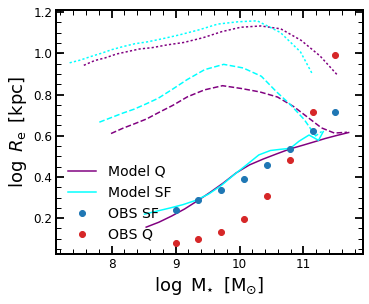

In [65]:

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5.5, 4.5))

# plot model
ax.plot(np.log10(mass_Q_z0), np.log10(RM_Q_z0), '-', color='purple', label='Model Q')
ax.plot(np.log10(mass_SF_z0),np.log10(RM_SF_z0), '-', color='cyan', label='Model SF')

ax.plot(np.log10(mass_Q_z1), np.log10(RM_Q_z1), '--', color='purple')
ax.plot(np.log10(mass_SF_z1),np.log10(RM_SF_z1), '--', color='cyan')

ax.plot(np.log10(mass_Q_z2), np.log10(RM_Q_z2), ':', color='purple')
ax.plot(np.log10(mass_SF_z2),np.log10(RM_SF_z2), ':', color='cyan')

# plot observations
ax.plot(log_mass_plot, np.log10(Mosleh2013_SF(10**log_mass_plot)), 'o', lw=3, color='C0', label='OBS SF')
ax.plot(log_mass_plot, np.log10(Mosleh2013_Q(10**log_mass_plot)), 'o', lw=3, color='C3', label='OBS Q')

# set axes
ax.set_xlabel(r'$\log\/\/\/\mathrm{M_{\star}}\/\/\/[\mathrm{M_{\odot}}]$', fontsize=18)
ax.set_ylabel(r'$\log\/\/\/R_{\rm e}\/\/\/[\mathrm{kpc}]$', fontsize=18)

#ax.set_xlim([9.0, 11.5])
#ax.set_ylim([-0.3, 1.5])

ax.legend(frameon=False, fontsize=14, loc='lower left')

plt.show()


## S1 (central stellar mass surface density) -Mass  

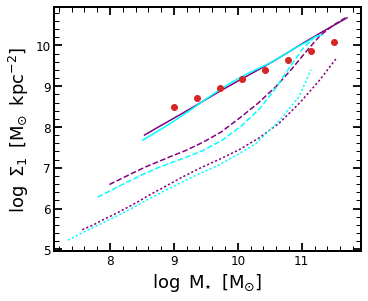

In [66]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5.5, 4.5))

ax.plot(np.log10(mass_Q_z0), np.log10(S1_Q_z0), '-', color='purple')
ax.plot(np.log10(mass_Q_z1), np.log10(S1_Q_z1), '--', color='purple')
ax.plot(np.log10(mass_Q_z2), np.log10(S1_Q_z2), ':', color='purple')

ax.plot(np.log10(mass_SF_z0), np.log10(S1_SF_z0), '-', color='cyan')
ax.plot(np.log10(mass_SF_z1), np.log10(S1_SF_z1), '--', color='cyan')
ax.plot(np.log10(mass_SF_z2), np.log10(S1_SF_z2), ':', color='cyan')

# plot observations
ax.plot(log_mass_plot, 9.29+0.64*(log_mass_plot-10.25), 'o', lw=3, color='C3', label='Q')

# set axes
ax.set_xlabel(r'$\log\/\/\/\mathrm{M_{\star}}\/\/\/[\mathrm{M_{\odot}}]$', fontsize=18)
ax.set_ylabel(r'$\log\/\/\/\Sigma_{\rm 1}\/\/\/[\mathrm{M_{\odot}}\/\/\/\mathrm{kpc}^{-2}]$', fontsize=18)

#ax.set_xlim([9.0, 11.5])
#ax.set_ylim([-0.3, 1.5])

plt.show()
